<a href="https://colab.research.google.com/github/PU-WEI-LU/Maching_learning_project/blob/main/Ads_CTR_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/求職專案資料/Ads_CTR_Optimisation.csv')


In [ ]:
# Implementing UCB
import math
N = 10000    #總用戶數
d = 10       #廣告數量
ads_selected = []

In [ ]:
#設定每個廣告的基礎，創建一個長度=d 且每個數都為0
numbers_of_selections = [0] * d
#每個廣告所得到的總獎勵數
sums_of_rewards = [0] * d
#總點擊數
total_reward = 0

In [ ]:
#第一個迴圈>計算用戶
for n in range(0, 1000):
  #有最大信賴區間上界的廣告
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
    #總點擊數/廣告的總次數>>投放廣告轉換率
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      #信賴區間
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      #信賴區間上界
      upper_bound = average_reward + delta_i
    else:       
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  #對每個用戶投哪個廣告    
  ads_selected.append(ad)
  #計算每個廣告有幾個用戶選
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  #投放的廣告客戶是否有點擊，有點擊reward=1
  reward = dataset.values[n, ad] 

  #每個廣告所對應的點擊數
  sums_of_rewards[ad] = sums_of_rewards[ad]+reward
  #總點擊數
  total_reward = total_reward + reward


  #numbers_of_selections[i] = 索引
  #如果投放廣告會增加信賴區間上界
  #if else 在初始階段使得1號客戶投放1號廣告給他，2號給2號給完後每一個廣告都被投放一次。會直接進入第一個if


In [ ]:
print(numbers_of_selections)

[109, 79, 53, 68, 287, 53, 86, 140, 64, 61]


In [ ]:
print(sum(numbers_of_selections))

1000


In [ ]:
print(max_upper_bound)

0.4655645340672775


In [ ]:
print(ads_selected)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

In [ ]:
print(sums_of_rewards)

[17, 8, 1, 5, 79, 1, 10, 27, 4, 3]


In [ ]:
print(total_reward)    

155


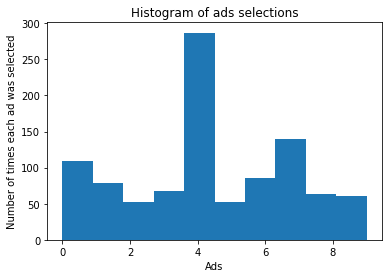

In [ ]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/求職專案資料/Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling
import random
#用戶數
N = 10000
#廣告數
d = 10
#對每位用戶投放哪個廣告(以隨機取樣的最大值作為投放標準)
ads_selected = []
#投放廣告且客戶有點擊
numbers_of_rewards_1 = [0] * d
#投放廣告且客戶未點擊
numbers_of_rewards_0 = [0] * d
#投放廣告總點擊
total_reward = 0

In [ ]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        #找出每個廣告的隨機取樣
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        #找出取樣最大值
        if random_beta > max_random:
            max_random = random_beta
            #最大取樣值是哪個廣告
            ad = i
    #蒐集對每一個用戶投放的廣告  
    ads_selected.append(ad)
    #每個用戶是否有點擊投放的廣告，有=1，無=0
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [ ]:
random_beta

0.02734348453588526

In [ ]:
print(ads_selected)

[9, 7, 4, 6, 8, 5, 2, 1, 1, 1, 3, 0, 4, 0, 4, 2, 6, 7, 2, 6, 5, 3, 8, 8, 0, 5, 7, 4, 8, 7, 1, 7, 0, 9, 9, 5, 7, 1, 9, 0, 0, 2, 3, 7, 8, 4, 1, 7, 4, 8, 6, 0, 7, 4, 7, 8, 2, 8, 9, 8, 1, 5, 7, 3, 2, 7, 4, 4, 5, 4, 4, 4, 7, 3, 4, 0, 7, 6, 7, 5, 3, 6, 4, 4, 8, 6, 4, 0, 2, 9, 4, 4, 1, 7, 4, 6, 8, 1, 4, 0, 4, 4, 7, 1, 4, 4, 4, 1, 8, 4, 7, 7, 5, 3, 7, 1, 4, 7, 1, 7, 4, 4, 2, 5, 4, 6, 1, 6, 6, 3, 8, 0, 6, 9, 6, 1, 7, 6, 4, 4, 4, 4, 4, 4, 4, 8, 4, 8, 8, 8, 4, 4, 4, 8, 4, 9, 8, 4, 4, 8, 4, 8, 7, 4, 8, 1, 3, 8, 4, 9, 8, 4, 4, 4, 4, 7, 4, 4, 8, 7, 4, 4, 8, 1, 3, 0, 8, 4, 4, 2, 1, 1, 4, 3, 4, 6, 4, 5, 4, 8, 0, 1, 6, 8, 5, 5, 8, 8, 7, 4, 5, 4, 9, 4, 4, 3, 7, 8, 8, 4, 1, 6, 5, 4, 2, 0, 5, 4, 4, 4, 5, 4, 1, 8, 4, 4, 4, 4, 7, 4, 4, 2, 4, 4, 7, 6, 4, 4, 4, 3, 8, 7, 6, 4, 4, 7, 7, 7, 4, 4, 8, 4, 7, 4, 4, 4, 4, 4, 9, 7, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 9, 4, 4, 4, 6, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 1, 8, 7, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 0, 4, 4, 6, 4, 4, 0, 

In [ ]:
print(numbers_of_rewards_1)

[11, 17, 0, 0, 2478, 2, 8, 64, 13, 0]


In [ ]:
print(numbers_of_rewards_0)

[59, 104, 23, 25, 6729, 38, 62, 258, 84, 25]


In [ ]:
print(total_reward)

2593


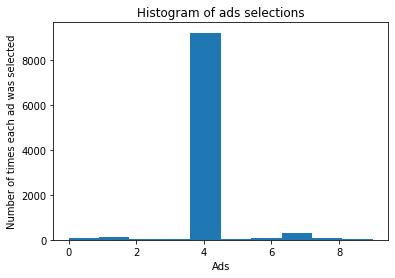

In [ ]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()